In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets, linear_model, metrics 
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
USAhousing = pd.read_csv(r'C:\Users\user\Downloads\cargoflash\data\USA_Housing.csv')
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
USAhousing

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [6]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

<AxesSubplot:>

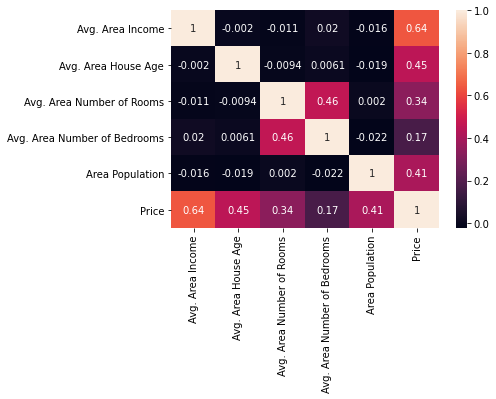

In [7]:
sns.heatmap(USAhousing.corr(), annot=True)

<AxesSubplot:xlabel='Price', ylabel='Density'>

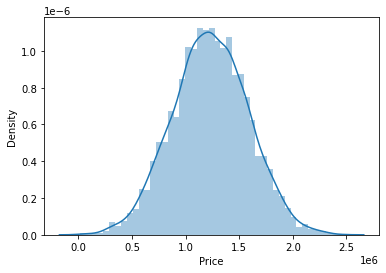

In [8]:
sns.distplot(USAhousing['Price'])

In [9]:
#x = USAhousing['Avg. Area Number of Bedrooms']
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

# LR 

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
X_train, X_test

(      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
 1840      55245.337288             3.965745                   8.961106   
 2115      62305.638407             6.490769                   7.647362   
 4437      77345.472379             5.407515                   8.243178   
 1146      65846.171039             6.385374                   6.804131   
 2486      69350.793357             6.910415                   8.288048   
 ...                ...                  ...                        ...   
 4426      76223.561256             6.371627                   5.342217   
 466       56685.014442             6.958045                   7.502115   
 3092      66195.337714             6.507971                   6.611861   
 3772      58694.515017             7.394768                   9.269453   
 860       61162.580254             5.896316                   7.880521   
 
       Avg. Area Number of Bedrooms  Area Population  
 1840                          4.38     435

In [12]:
y_train, y_test

(1840    8.814461e+05
 2115    1.375771e+06
 4437    1.137069e+06
 1146    9.289500e+05
 2486    1.392084e+06
             ...     
 4426    1.023944e+06
 466     1.223101e+06
 3092    1.318598e+06
 3772    1.708631e+06
 860     1.060898e+06
 Name: Price, Length: 3500, dtype: float64,
 1501    1.339096e+06
 2586    1.251794e+06
 2653    1.340095e+06
 1055    1.431508e+06
 705     1.042374e+06
             ...     
 3563    1.348222e+06
 1538    1.309937e+06
 1837    1.472887e+06
 2380    1.409762e+06
 1912    1.009606e+06
 Name: Price, Length: 1500, dtype: float64)

In [13]:
reg = linear_model.LinearRegression() 
reg.fit(X_train, y_train) 
y_pre=reg.predict(X_test)
print('Coefficients: \n', reg.coef_) 

Coefficients: 
 [2.16257989e+01 1.65590393e+05 1.19827783e+05 2.36109526e+03
 1.52165814e+01]


In [14]:
print('Variance score: ',reg.score(X_test, y_test))

Variance score:  0.9146818498754012


In [15]:
print(type(y_test),type(y_pre))
data = {'Actual':y_test,'Predicted':y_pre}
df1=pd.DataFrame(data)
df1

<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


,Actual,Predicted
1501,1.339096e+06,1.308536e+06
2586,1.251794e+06,1.237123e+06
2653,1.340095e+06,1.243836e+06
1055,1.431508e+06,1.229242e+06
705,1.042374e+06,1.059353e+06
...,...,...
3563,1.348222e+06,1.437325e+06
1538,1.309937e+06,1.094962e+06
1837,1.472887e+06,1.457120e+06
2380,1.409762e+06,1.483429e+06


<AxesSubplot:xlabel='Avg. Area Income', ylabel='Price'>

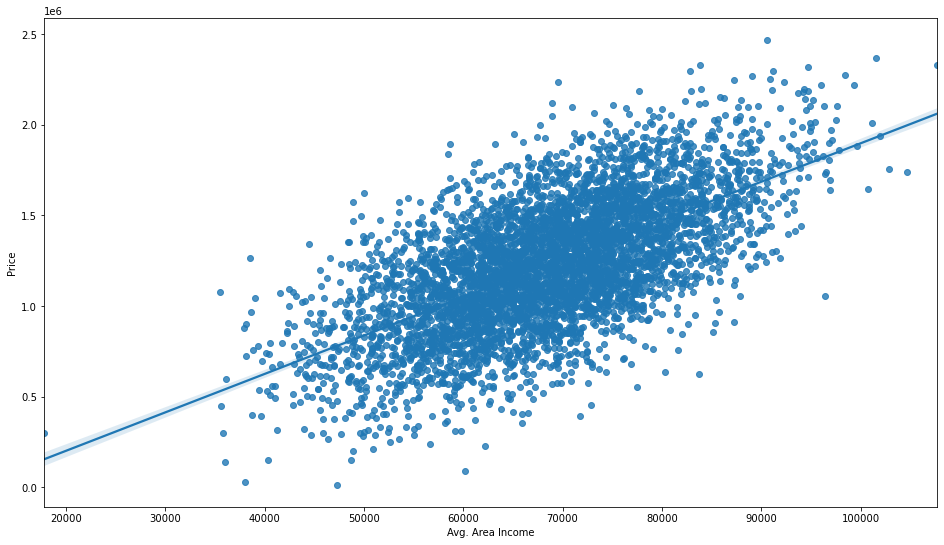

In [16]:
plt.figure(figsize= (16,9))
sns.regplot(x ='Avg. Area Income', y ='Price',data = USAhousing)

<AxesSubplot:xlabel='Avg. Area House Age', ylabel='Price'>

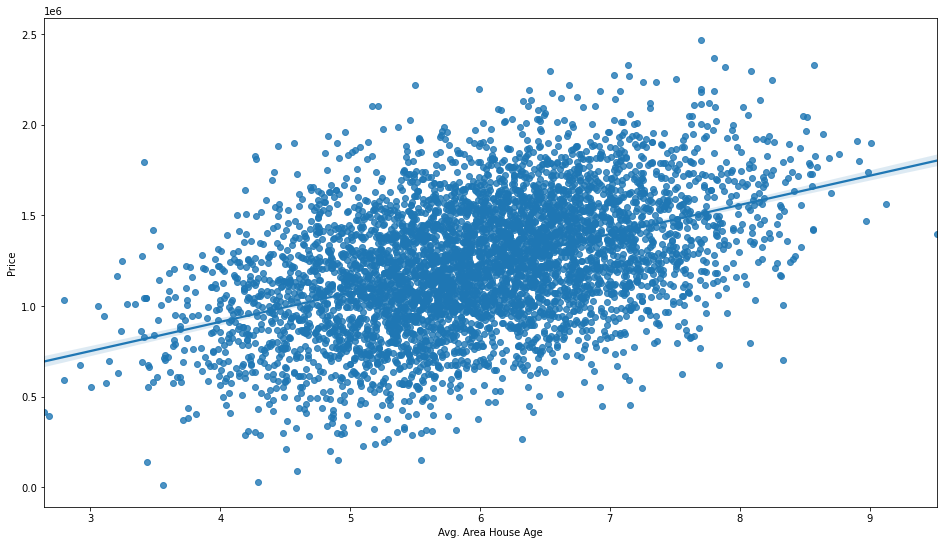

In [17]:
plt.figure(figsize= (16,9))
sns.regplot(x ='Avg. Area House Age', y ='Price',data = USAhousing)

<AxesSubplot:xlabel='Avg. Area Number of Rooms', ylabel='Price'>

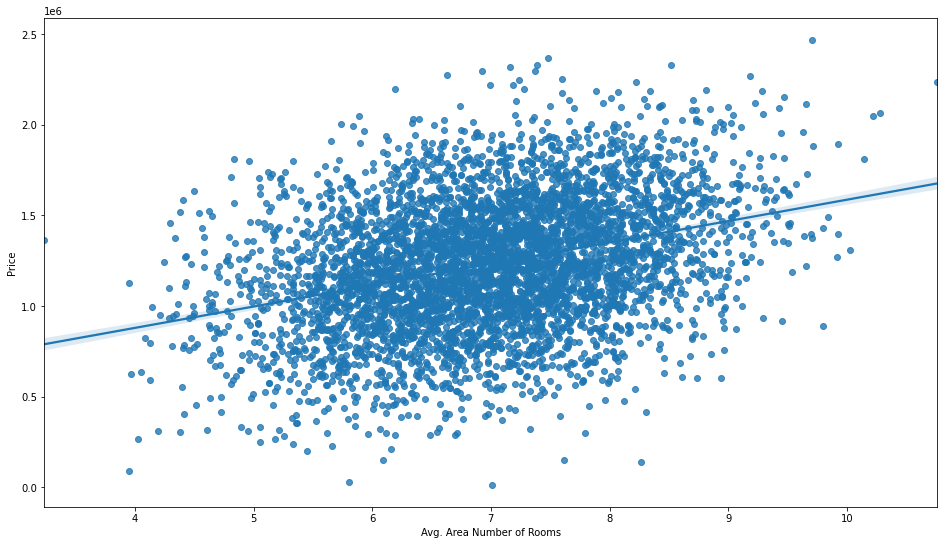

In [18]:

plt.figure(figsize= (16,9))
sns.regplot(x ='Avg. Area Number of Rooms', y ='Price',data = USAhousing)

<AxesSubplot:xlabel='Avg. Area Number of Bedrooms', ylabel='Price'>

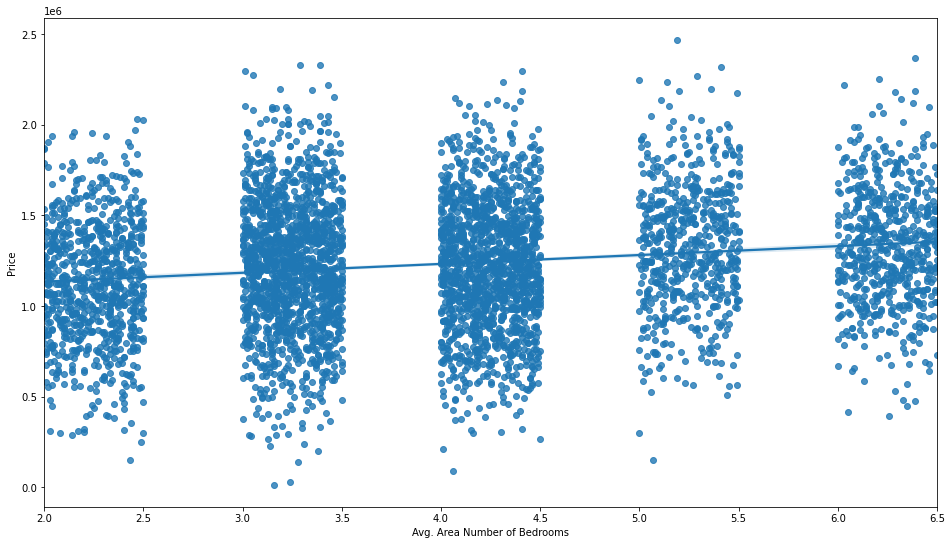

In [19]:
plt.figure(figsize= (16,9))
sns.regplot(x ='Avg. Area Number of Bedrooms', y ='Price',data = USAhousing)

<AxesSubplot:xlabel='Area Population', ylabel='Price'>

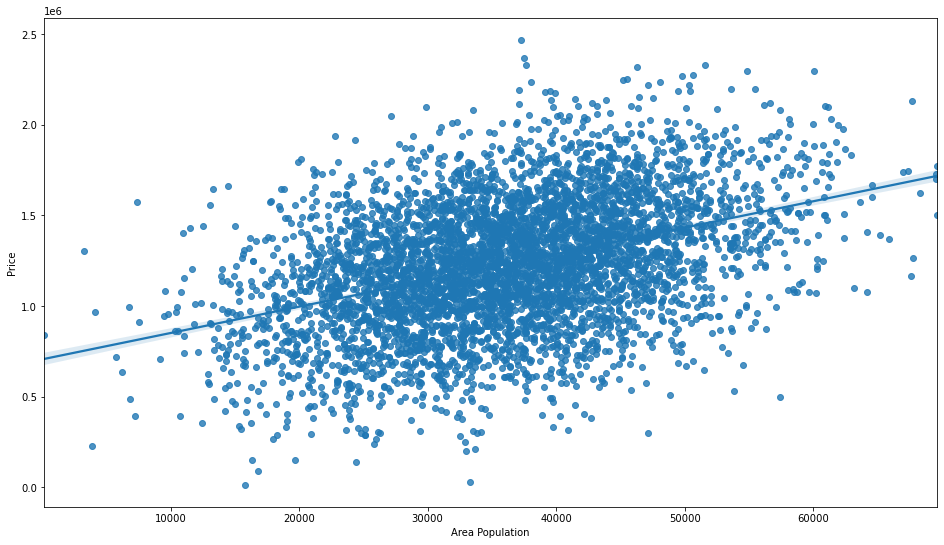

In [20]:

plt.figure(figsize= (16,9))
sns.regplot(x ='Area Population', y ='Price',data = USAhousing)

In [26]:
USAhousing.drop(['Address'],axis=1,inplace=True)

In [27]:
data = USAhousing
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [33]:
num_vars = data.columns

num_vars = list(num_vars)

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
4966,1.775964,-0.472411,1.167281,1.746948,0.384029,1.458408
4086,0.845591,-0.421841,0.216896,-0.466551,-0.128485,0.364878
2881,0.410495,-0.582645,0.744527,-0.442227,-0.057490,-0.303949
1237,0.307525,-0.101316,-2.327894,-0.758442,-0.498020,-1.008786
1429,0.770134,-0.539488,-0.912530,0.384794,-0.129946,-0.629606
2530,0.875080,0.748244,0.436301,0.968575,-0.486458,0.860604
2937,0.362615,0.296890,0.377180,0.084796,-0.746400,-0.055956
283,0.497551,0.472199,1.275708,0.173985,1.157943,1.934110
966,-0.155214,-0.485464,-1.026750,-0.644929,-0.600025,-1.187627
4847,0.807533,0.661336,-0.680048,-1.366546,0.033670,0.779271


In [35]:
y_train = df_train.pop('Price')
X_train = df_train

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 4)             
rfe = rfe.fit(X_train, y_train)

In [17]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Avg. Area Income', True, 1),
 ('Avg. Area House Age', True, 1),
 ('Avg. Area Number of Rooms', True, 1),
 ('Avg. Area Number of Bedrooms', True, 1),
 ('Area Population', False, 2)]

In [39]:
X_train_rfe = X_train

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()

In [40]:
X_train_rfe

,const,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4966,1.0,1.775964,-0.472411,1.167281,1.746948,0.384029
4086,1.0,0.845591,-0.421841,0.216896,-0.466551,-0.128485
2881,1.0,0.410495,-0.582645,0.744527,-0.442227,-0.057490
1237,1.0,0.307525,-0.101316,-2.327894,-0.758442,-0.498020
1429,1.0,0.770134,-0.539488,-0.912530,0.384794,-0.129946
...,...,...,...,...,...,...
4149,1.0,0.770108,-0.401848,0.210729,-0.701685,-1.418777
1890,1.0,-1.339451,0.172896,-0.896911,-1.277357,1.422277
350,1.0,1.206971,0.509405,-0.074452,-0.782766,-0.507664
79,1.0,-0.394855,0.983653,1.515132,1.771272,0.315082


In [41]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     7799.
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:22:50   Log-Likelihood:                -594.45
No. Observations:                3500   AIC:                             1201.
Df Residuals:                    3494   BIC:                             1238.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [46]:
X_train_new = X_train_rfe.drop(['const','Avg. Area Number of Bedrooms'], axis=1)

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Avg. Area Income,1.0
1,Avg. Area House Age,1.0
2,Avg. Area Number of Rooms,1.0
3,Area Population,1.0


In [48]:
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

In [49]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     9751.
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:28:31   Log-Likelihood:                -594.51
No. Observations:                3500   AIC:                             1199.
Df Residuals:                    3495   BIC:                             1230.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [50]:
X_train_new.shape

(3500, 5)

Text(0.5, 0, 'Errors')

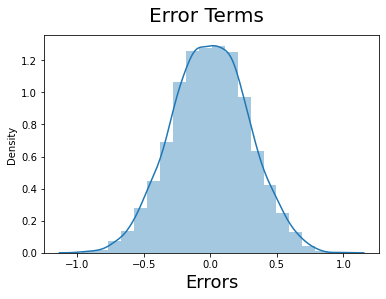

In [51]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  